<a href="https://colab.research.google.com/github/RonanD10/Tennis-Match-Prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F

from google.colab import drive, files
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tennis Project/features_processed_random.csv')

In [59]:
features.head(10)

,A_rank,B_rank,A_elo_surface,B_elo_surface,A_elo,B_elo,A_avged_elo,B_avged_elo,A_wins,B_wins,A_wins_surface,B_wins_surface,A_12month_form,B_12month_form,A_12month_form_surface,B_12month_form_surface,A_hand,B_hand,A_won,surface_carpet,surface_clay,surface_grass,surface_hard
0,23.0,3.0,1644.770,1988.523,1772.521,2151.654,2070.0885,1708.6455,0,0,0,0,0.000000,0.833333,0.000000,0.833333,0.0,0.0,0,0,0,1,0
1,22.0,30.0,1584.360,1501.014,1859.956,1714.681,1722.1580,1607.8475,0,0,0,0,0.666667,0.000000,0.666667,0.000000,1.0,0.0,1,0,0,1,0
2,58.0,55.0,1792.652,1554.535,1821.925,1712.486,1633.5105,1807.2885,0,0,0,0,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0,0,0,1,0
3,39.0,15.0,1542.475,1740.677,1794.640,1885.650,1813.1635,1668.5575,0,0,0,0,0.000000,0.750000,0.000000,0.750000,0.0,0.0,0,0,0,1,0
4,97.0,18.0,1503.159,1766.935,1607.397,1922.537,1844.7360,1555.2780,0,0,0,0,0.000000,0.666667,0.000000,0.666667,0.0,1.0,0,0,0,1,0
5,109.0,115.0,1523.094,1531.998,1569.565,1550.681,1546.3295,1541.3395,0,0,0,0,0.500000,0.000000,0.500000,0.000000,0.0,0.0,1,0,0,1,0
6,51.0,2.0,1508.699,1632.985,1597.918,2057.499,1845.2420,1553.3085,0,0,0,0,0.000000,0.666667,0.000000,0.666667,0.0,1.0,0,0,0,1,0
7,87.0,106.0,1492.022,1562.253,1700.365,1596.265,1579.2590,1596.1935,0,0,0,0,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0,0,0,1,0
8,163.0,57.0,1459.773,1774.725,1514.907,1724.923,1749.8240,1487.3400,0,0,0,0,0.000000,0.800000,0.000000,0.800000,0.0,0.0,0,0,0,1,0
9,130.0,12.0,1549.622,1504.107,1528.973,1816.887,1539.2975,1660.4970,0,0,0,0,0.666667,0.000000,0.666667,0.000000,0.0,0.0,1,0,0,1,0


In [57]:
# Machine learning model comparisons

X = features.drop('A_won', axis=1)
y = features['A_won']

X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test = X[int(0.2 * len(y)):]
y_test = y[int(0.2 * len(y)):]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lreg = LogisticRegression()
rfc = RandomForestClassifier()

lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic regression accuracy:", accuracy)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random forest accuracy:", accuracy)

# compare model coeffs
# gridsearchCV

Logistic regression accuracy: 0.7533797909407666
Random forest accuracy: 0.9202787456445993


In [58]:
# Predicting outcome based only on ranking
correct = 0
for i in range(len(features)):
    if features.loc[i, 'A_rank'] > features.loc[i, 'B_rank'] and features.loc[i, 'A_won'] == 1:
        correct += 1
    elif features.loc[i, 'A_rank'] < features.loc[i, 'B_rank'] and features.loc[i, 'A_won'] == 0:
        correct += 1
    else:
        pass

print('Accuracy: ', correct/len(features))

# Predicting outcome based only on Elo
correct = 0
for i in range(len(features)):
    if features.loc[i, 'A_elo'] > features.loc[i, 'B_elo'] and features.loc[i, 'A_won'] == 1:
        correct += 1
    elif features.loc[i, 'A_elo'] < features.loc[i, 'B_elo'] and features.loc[i, 'A_won'] == 0:
        correct += 1
    else:
        pass

print('Accuracy: ', correct/len(features))

# Predicting outcome based only on 12 month form
correct = 0
for i in range(len(features)):
    if features.loc[i, 'A_12month_form'] > features.loc[i, 'B_12month_form'] and features.loc[i, 'A_won'] == 1:
        correct += 1
    elif features.loc[i, 'A_12month_form'] < features.loc[i, 'B_12month_form'] and features.loc[i, 'A_won'] == 0:
        correct += 1
    else:
        pass

print('Accuracy: ', correct/len(features))

Accuracy:  0.34074595453468437


## Deep Learning Model

In [20]:
class Model(nn.Module):
  def __init__(self, in_features=22, h1=24, h2=24, out_features=2):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

model = Model()

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(list(y_test))

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  if loss < 5:
    losses.append(loss.detach().numpy())

  if i % 50 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.675724983215332
Epoch: 50 and loss: 0.494741827249527
Epoch: 100 and loss: 0.32161635160446167
Epoch: 150 and loss: 0.18899907171726227
Epoch: 200 and loss: 0.12668350338935852
Epoch: 250 and loss: 0.09055301547050476
Epoch: 300 and loss: 0.06741134077310562
Epoch: 350 and loss: 0.05278889462351799
Epoch: 400 and loss: 0.043020881712436676
Epoch: 450 and loss: 0.03629358112812042
Epoch: 500 and loss: 0.0315508171916008
Epoch: 550 and loss: 0.027840955182909966
Epoch: 600 and loss: 0.024822335690259933
Epoch: 650 and loss: 0.02233138121664524
Epoch: 700 and loss: 0.020235585048794746
Epoch: 750 and loss: 0.018538864329457283
Epoch: 800 and loss: 0.017194123938679695
Epoch: 850 and loss: 0.01605703867971897
Epoch: 900 and loss: 0.015096312388777733
Epoch: 950 and loss: 0.014272516593337059


Text(0.5, 0, 'Epoch')

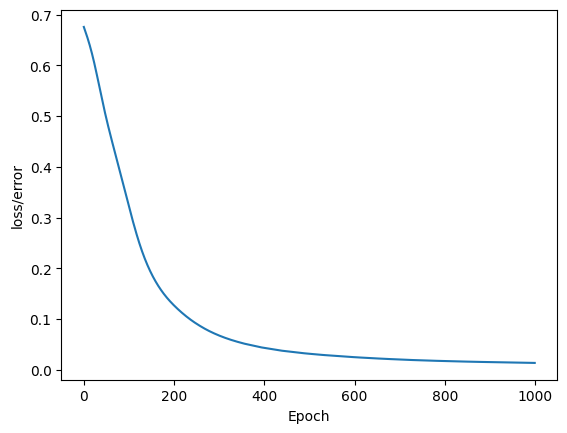

In [26]:
plt.plot(range(len(losses)), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [38]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy_score(y_test, torch.argmax(y_eval, dim=1))}')


Loss: 0.013858288526535034
Accuracy: 0.99707306874804
